# Praca Inż

## Essential Imports

In [2]:
import numpy as np
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import matplotlib.cm, matplotlib.colors
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets, manifold

from time import time
import time
import warnings
from itertools import cycle, islice

import matplotlib.gridspec as gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan

from sklearn.cluster import BisectingKMeans, KMeans

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

## Data

In [3]:
data_1 = np.loadtxt('c12_data.txt', delimiter='\t')
data_2 = np.loadtxt('c12_noise_data.txt', delimiter='\t')
data_3 = np.loadtxt('3N_forces_data.txt', delimiter='\t')
data_4 = np.loadtxt('3N_forces_noise_data.txt', delimiter='\t')

## Data Plotting

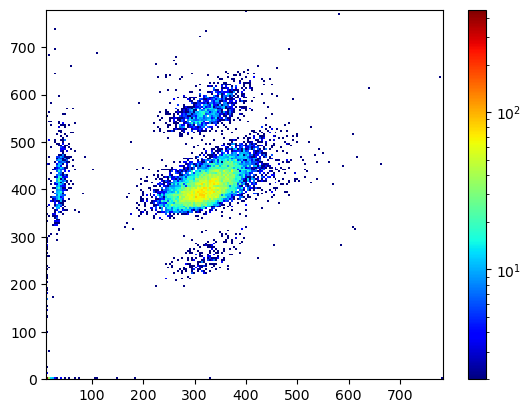

In [3]:
fig, ax = plt.subplots()
counts, xedges, yedges, im = ax.hist2d(data_1[:,0], data_1[:,1], bins = 200, cmap='jet', norm = LogNorm())
fig.colorbar(im, ax=ax)

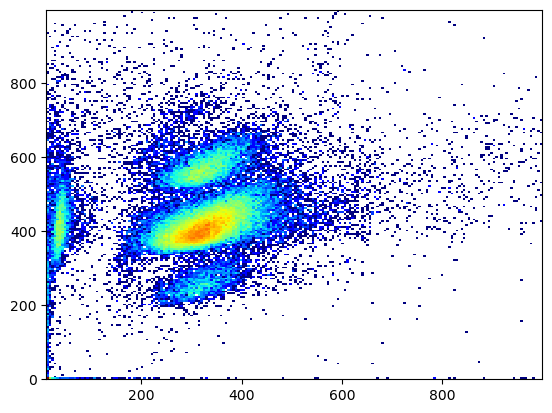

In [7]:
plt.hist2d(data_2[:,0], data_2[:,1], bins = 200, cmap='jet', norm = LogNorm())
plt.show()

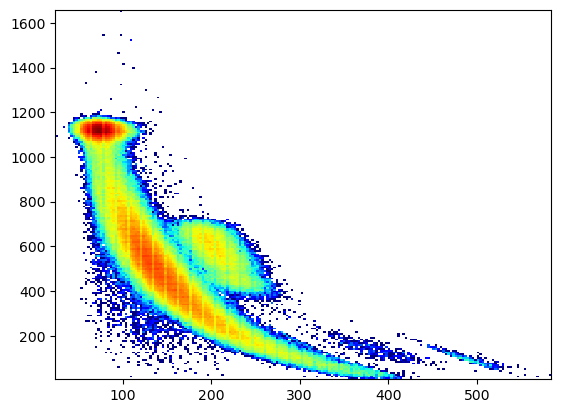

In [8]:
plt.hist2d(data_3[:,0], data_3[:,1], bins = 200, cmap='jet', norm = LogNorm())
plt.show()

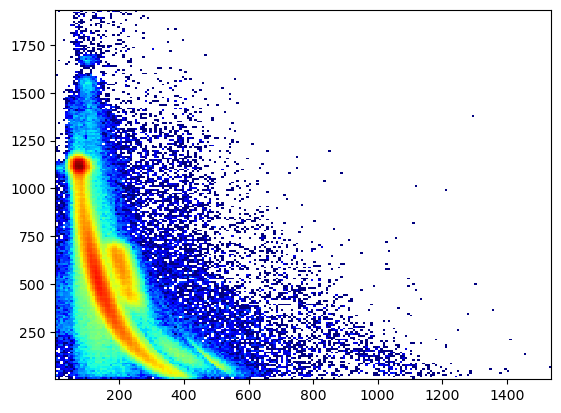

In [9]:
plt.hist2d(data_4[:,0], data_4[:,1], bins = 200, cmap='jet', norm = matplotlib.colors.LogNorm())
plt.show()

In [4]:
def plot_clusters(data, db_data, labels, n_clusters, noise='k'):
    
    '''
    Parametry:
    - data (numpy.ndarray): Dwuwymiarowa tablica zawierająca dane, gdzie każdy wiersz reprezentuje jedną próbkę, a każda kolumna to cecha.
    - db_data: Wytrenowany model
    - labels (numpy.ndarray): Jednowymiarowa tablica zawierająca przypisane etykiety dla każdej próbki w danych.
    - n_clusters (int): Szacowana liczba klastrów w danych.
    - noise: Domyślnie 'k', opcjonalnie do wyboru kolor 'none'

    '''
    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db_data.core_sample_indices_] = True

    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
            pass

        class_member_mask = labels == k
        xy = data[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor=col,
            markersize=10,
        )

        xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor=noise, #or none
            markersize=0.5,
        )

    plt.title(f"Estimated number of clusters: {n_clusters}")
    plt.show()

## Code for DBSCANS

### Experimental DBSCAN

In [16]:
db_data_1 = DBSCAN(eps=10, min_samples=100).fit(data_1)
labels_data_1 = db_data_1.labels_

n_clusters_data_1 = len(set(labels_data_1)) - (1 if -1 in labels_data_1 else 0)
n_noise_data_1 = list(labels_data_1).count(-1)

print("Estimated number of clusters: %d" % n_clusters_data_1)
print("Estimated number of noise points: %d" % n_noise_data_1)

Estimated number of clusters: 4
Estimated number of noise points: 2880


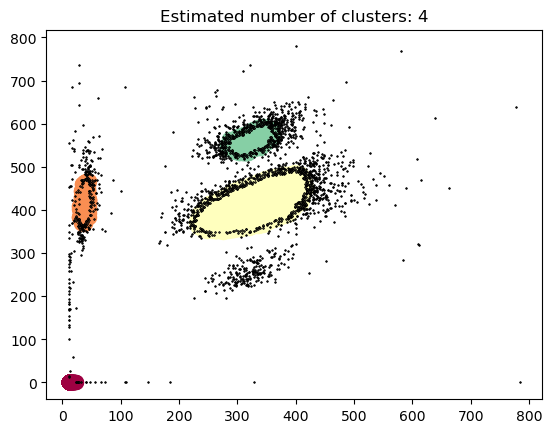

In [9]:
unique_labels_data_1 = set(labels_data_1)
core_samples_mask_data_1 = np.zeros_like(labels_data_1, dtype=bool)
core_samples_mask_data_1[db_data_1.core_sample_indices_] = True

colors_data_1 = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_data_1))]

for k, col in zip(unique_labels_data_1, colors_data_1):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        pass

    class_member_mask_data_1 = labels_data_1 == k
    xy = data_1[class_member_mask_data_1 & core_samples_mask_data_1]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor=col, #k
        markersize=10,
    )

    xy = data_1[class_member_mask_data_1 & ~core_samples_mask_data_1]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=0.5,
    )

plt.title(f"Estimated number of clusters: {n_clusters_data_1}")
plt.show()

### Optimatez DBSCAN

In [23]:
db_data_1 = DBSCAN(eps=10, min_samples=100).fit(data_1)
labels_data_1 = db_data1.labels_

n_clusters_data_1 = len(set(labels_data_1)) - (1 if -1 in labels_data_1 else 0)
n_noise_data_1 = list(labels_data_1).count(-1)

print("Estimated number of clusters: %d" % n_clusters_data_1)
print("Estimated number of noise points: %d" % n_noise_data_1)

Estimated number of clusters: 4
Estimated number of noise points: 2880


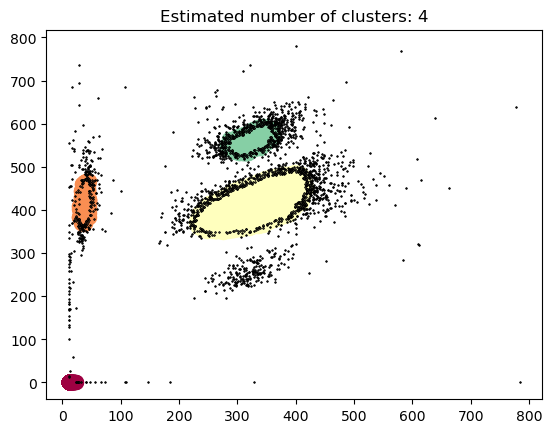

In [25]:
unique_labels_data_1 = set(labels_data_1)
core_samples_mask_data_1 = np.zeros_like(labels_data_1, dtype=bool)
core_samples_mask_data_1[db_data_1.core_sample_indices_] = True

colors_data_1 = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_data_1))]

for k, col in zip(unique_labels_data_1, colors_data_1):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        pass

    class_member_mask_data_1 = labels_data_1 == k
    xy = data_1[class_member_mask_data_1 & core_samples_mask_data_1]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor=col, #k
        markersize=10,
    )

    xy = data_1[class_member_mask_data_1 & ~core_samples_mask_data_1]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=0.5,
    )

plt.title(f"Estimated number of clusters: {n_clusters_data_1}")
plt.show()

In [27]:
db_data_2 = DBSCAN(eps=10, min_samples=100).fit(data_2) #10
labels_data_2 = db_data_2.labels_

n_clusters_data_2 = len(set(labels_data_2)) - (1 if -1 in labels_data_2 else 0)
n_noise_data_2 = list(labels_data_2).count(-1)

print("Estimated number of clusters: %d" % n_clusters_data_2)
print("Estimated number of noise points: %d" % n_noise_data_2)

Estimated number of clusters: 5
Estimated number of noise points: 13225


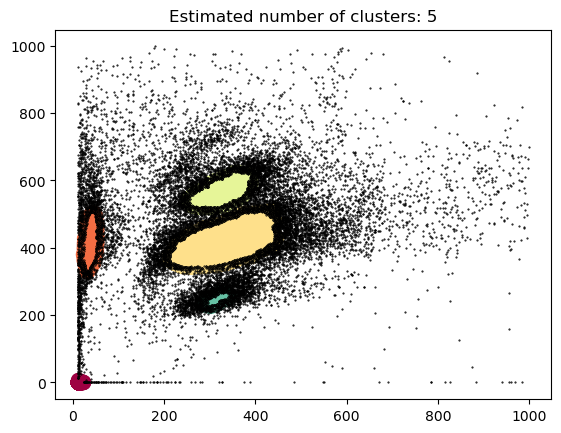

In [32]:
unique_labels_data_2 = set(labels_data_2)
core_samples_mask_data_2 = np.zeros_like(labels_data_2, dtype=bool)
core_samples_mask_data_2[db_data_2.core_sample_indices_] = True

colors_data_2 = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_data_2))]

for k, col in zip(unique_labels_data_2, colors_data_2):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        pass

    class_member_mask_data_2 = labels_data_2 == k
    xy = data_2[class_member_mask_data_2 & core_samples_mask_data_2]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor=col, #k
        markersize=10,
    )

    xy = data_2[class_member_mask_data_2 & ~core_samples_mask_data_2]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=0.5,
    )

plt.title(f"Estimated number of clusters: {n_clusters_data_2}")
plt.show()

In [35]:
#eps=3, min=100 oraz eps=4 i min 50
db_data_3 = DBSCAN(eps=3, min_samples=100).fit(data_3)  #wywala na epsilon 5, eps=4 i min=50 działa
labels_data_3 = db_data_3.labels_ 

n_clusters_data_3 = len(set(labels_data_3)) - (1 if -1 in labels_data_3 else 0)
n_noise_data_3 = list(labels_data_3).count(-1)

print("Estimated number of clusters: %d" % n_clusters_data_3)
print("Estimated number of noise points: %d" % n_noise_data_3)

Estimated number of clusters: 6
Estimated number of noise points: 61249


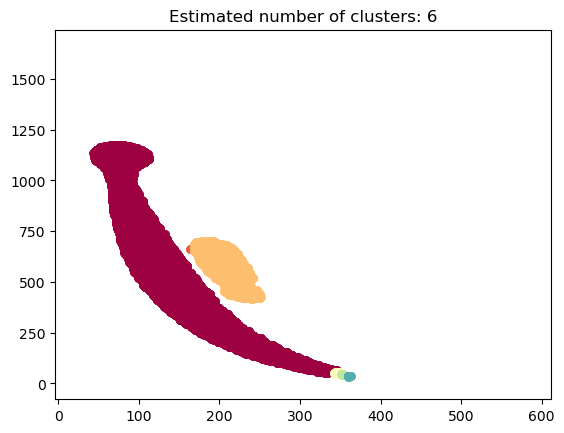

In [39]:
unique_labels_data_3 = set(labels_data_3)
core_samples_mask_data_3 = np.zeros_like(labels_data_3, dtype=bool)
core_samples_mask_data_3[db_data_3.core_sample_indices_] = True

colors_data_3 = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_data_3))]

for k, col in zip(unique_labels_data_3, colors_data_3):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        pass

    class_member_mask_data_3 = labels_data_3 == k
    xy = data3[class_member_mask_data_3 & core_samples_mask_data_3]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor=col, #k <--- tutaj patrzec na krawędzie
        markersize=5,
    )

    xy = data3[class_member_mask_data_3 & ~core_samples_mask_data_3]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        ".",
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=0, #0 wywalić noise
    )

plt.title(f"Estimated number of clusters: {n_clusters_data_3}")
plt.show()

In [40]:
db_data_4 = DBSCAN(eps=3, min_samples=100).fit(data_4)  #wywala na epsilon 5
labels_data_4 = db_data_4.labels_

n_clusters_data_4 = len(set(labels_data_4)) - (1 if -1 in labels_data_4 else 0)
n_noise_data_4 = list(labels_data_4).count(-1)

print("Estimated number of clusters: %d" % n_clusters_data_4)
print("Estimated number of noise points: %d" % n_noise_data_4)

Estimated number of clusters: 8
Estimated number of noise points: 158238


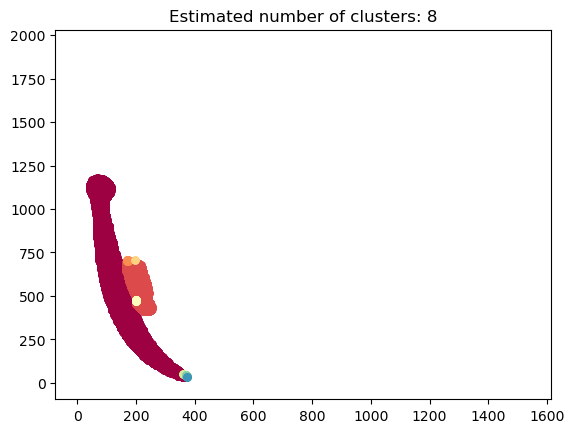

In [44]:
unique_labels_data_4 = set(labels_data_4)
core_samples_mask_data_4 = np.zeros_like(labels_data_4, dtype=bool)
core_samples_mask_data_4[db_data_4.core_sample_indices_] = True

colors_data_4 = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_data_4))]

for k, col in zip(unique_labels_data_4, colors_data_4):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        pass

    class_member_mask_data_4 = labels_data_4 == k
    xy = data_4[class_member_mask_data_4 & core_samples_mask_data_4]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor=col, #k <--- tutaj patrzec na krawędzie
        markersize=5,
    )

    xy = data_4[class_member_mask_data_4 & ~core_samples_mask_data_4]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        ".",
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=0, #0 wywalić noise
    )

plt.title(f"Estimated number of clusters: {n_clusters_data_4}")
plt.show()

## Code for AgglomerativeClustering
 Nie działa dla data_2, data_3, data_4

 Złożoność czasowa dla AgglomerativeClustering wynosi O(n2), przez co maszyna potrzebuje zamiast 1.5gb RAMu ok 2.1TB
 
 Pierwszym rozwiązaniem jest zmniejszenie ilości danych tak, aby maszyna była w stanie jest przetworzyć
 
 Drugim natomiast jest zastosowanie algorytmów o mniejszej złożoności

In [10]:
X_red = AgglomerativeClustering(n_clusters=6).fit(data_1)
labels = X_red.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 0


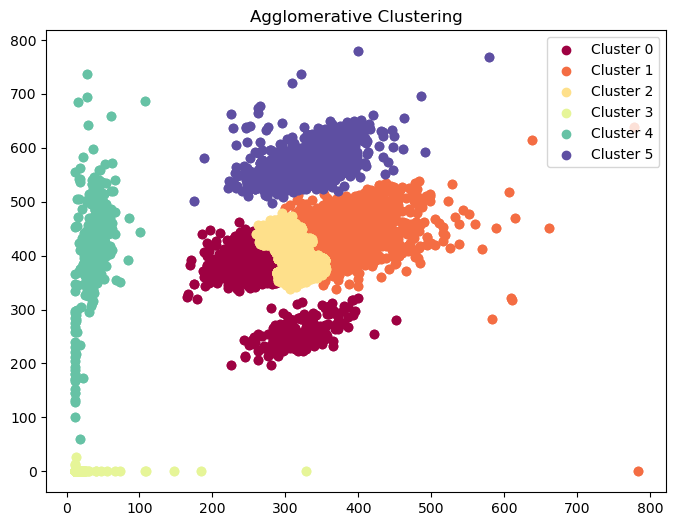

In [11]:
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'k'  # Czarny kolor dla punktów odstających
    class_member_mask = (labels == label)
    xy = data_1[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[color], label='Cluster %d' % label)

plt.title('Agglomerative Clustering')
plt.legend(loc='upper right')
plt.show()

In [11]:
np.random.seed(0)  # Ustaw ziarno losowe dla reprodukowalności
random_indices = np.random.choice(len(data_2), len(data_2) // 2, replace=False)
reduced_data = data_2[random_indices]

In [13]:
print(len(reduced_data))

28927


In [17]:
X_red = AgglomerativeClustering(n_clusters=6).fit(reduced_data)
labels = X_red.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 0


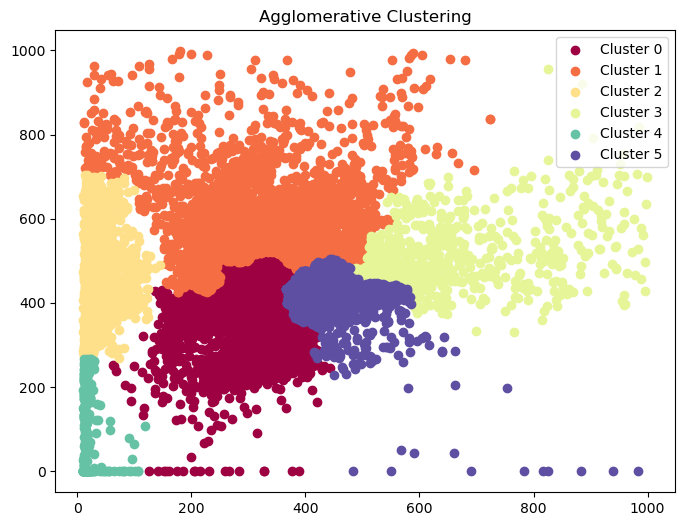

In [22]:
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'k'  # Czarny kolor dla punktów odstających
    class_member_mask = (labels == label)
    xy = reduced_data[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[color], label='Cluster %d' % label)

plt.title('Agglomerative Clustering')
plt.legend(loc='upper right')
plt.show()

In [16]:
np.random.seed(0)  # Ustaw ziarno losowe dla reprodukowalności
random_indices = np.random.choice(len(data_3), len(data_3) // 30, replace=False)
reduced_data = data_3[random_indices]

#print(len(reduced_data))

In [18]:
X_red = AgglomerativeClustering(n_clusters=6).fit(reduced_data)
labels = X_red.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 0


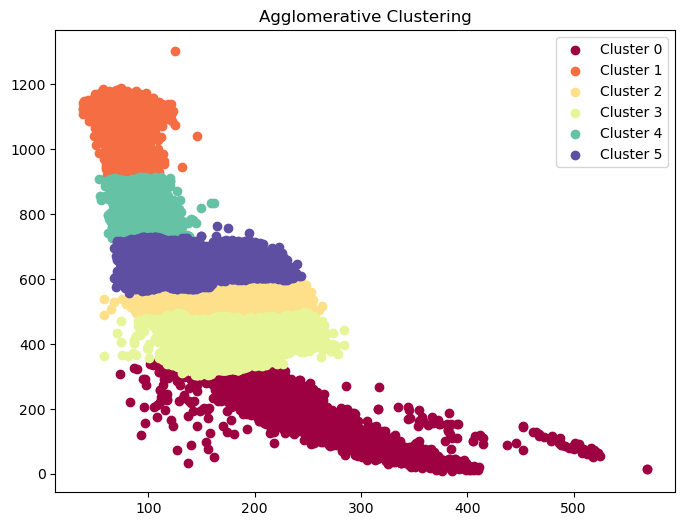

In [19]:
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'k'  # Czarny kolor dla punktów odstających
    class_member_mask = (labels == label)
    xy = reduced_data[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[color], label='Cluster %d' % label)

plt.title('Agglomerative Clustering')
plt.legend(loc='upper right')
plt.show()

In [25]:
np.random.seed(0)  # Ustaw ziarno losowe dla reprodukowalności
random_indices = np.random.choice(len(data_4), len(data_4) // 30, replace=False)
reduced_data = data_4[random_indices]

#print(len(reduced_data))

In [31]:
X_red = AgglomerativeClustering(n_clusters=6).fit(reduced_data)
labels = X_red.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 0


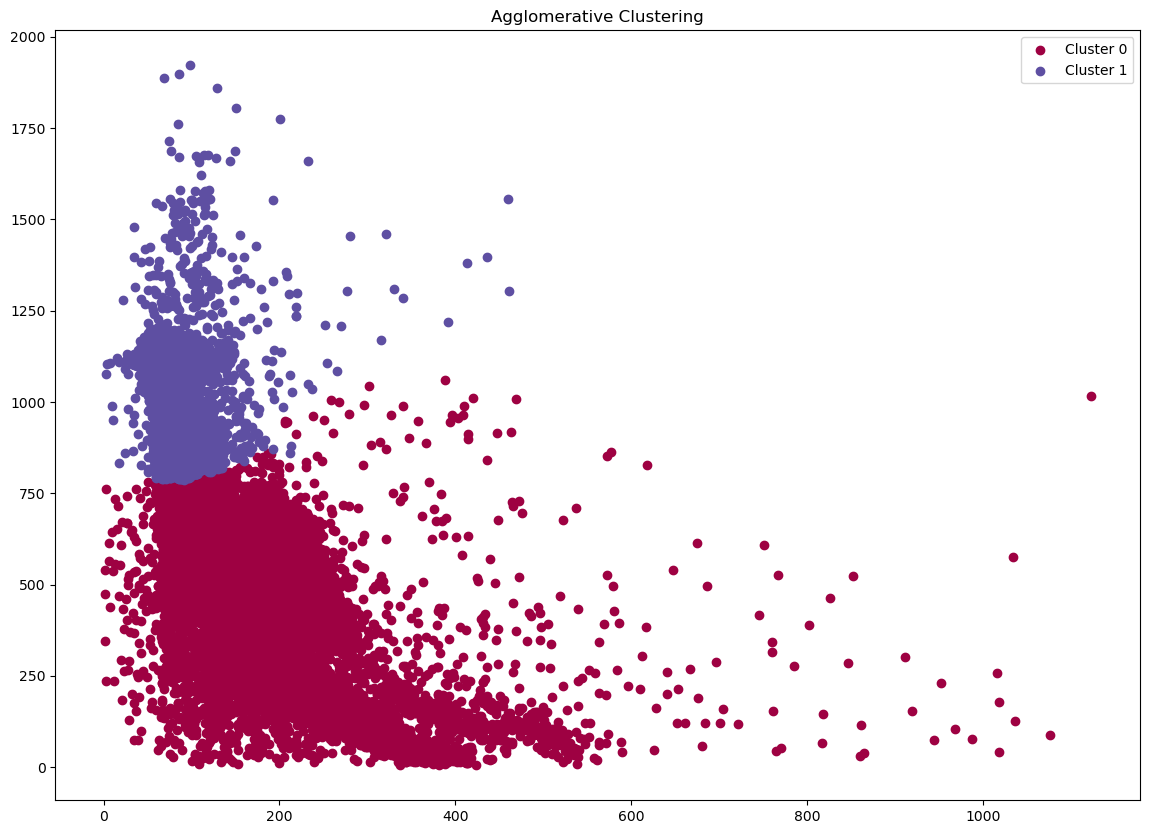

In [30]:
plt.figure(figsize=(14, 10))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'k'  # Czarny kolor dla punktów odstających
    class_member_mask = (labels == label)
    xy = reduced_data[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[color], label='Cluster %d' % label)

plt.title('Agglomerative Clustering')
plt.legend(loc='upper right')
plt.show()

### Code for Agglomerative Clustering

Zastotowanie linkage='complete' daje najbliższe efekty DBCSAN, punkty skupiają się wokół cetroidów okrężenie.

Zastosowanie average oraz single daje niesatysfakcjonujące rezultaty.

Pamiętać, że AC dziala w zbyt dużej złożoności

In [5]:
np.random.seed(0)  # Ustaw ziarno losowe dla reprodukowalności
random_indices = np.random.choice(len(data_2), len(data_2) // 2, replace=False)
reduced_data = data_2[random_indices]

In [9]:
#{'ward', 'complete', 'average', 'single'}
X_red = AgglomerativeClustering(n_clusters=5, linkage='average').fit(reduced_data)
labels = X_red.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 0


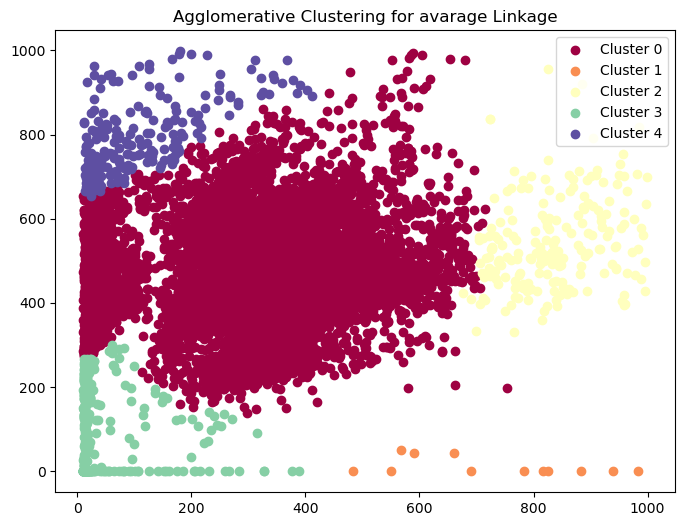

In [10]:
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'k'  # Czarny kolor dla punktów odstających
    class_member_mask = (labels == label)
    xy = reduced_data[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[color], label='Cluster %d' % label)

plt.title('Agglomerative Clustering for avarage Linkage')
plt.legend(loc='upper right')
plt.show()

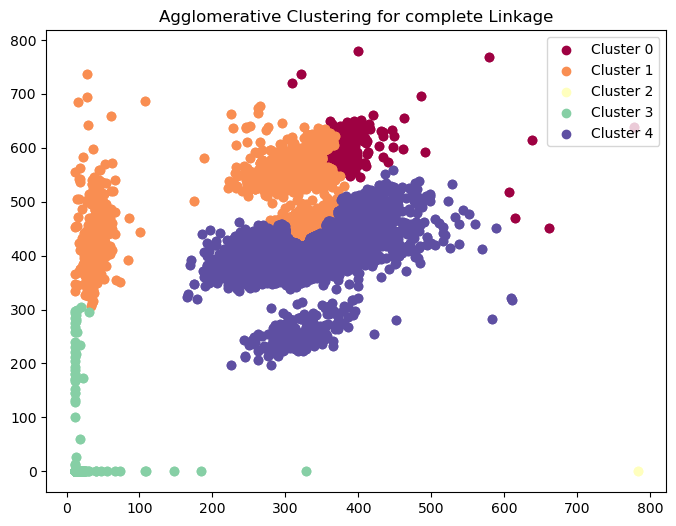

In [22]:
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'k'  # Czarny kolor dla punktów odstających
    class_member_mask = (labels == label)
    xy = data_1[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[color], label='Cluster %d' % label)

plt.title('Agglomerative Clustering for complete Linkage')
plt.legend(loc='upper right')
plt.show()

## Code for OPTICS

Usprawnić jego działanie przez użycie metody dbscan (czy to ma sens)

In [57]:
optics = OPTICS(max_eps=6, min_samples=300).fit(data_1)
labels = optics.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 26527


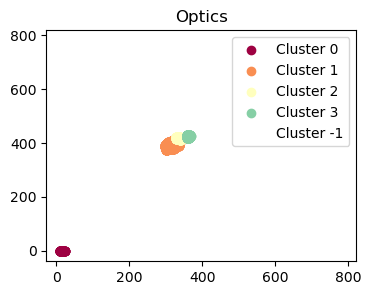

In [58]:
plt.figure(figsize=(4, 3))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'none'  #  'k' Czarny kolor dla punktów odstających
    class_member_mask = (labels == label)
    xy = data_1[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[color], label='Cluster %d' % label)

plt.title('Optics')
plt.legend(loc='upper right')
plt.show()

In [61]:
optics = OPTICS(max_eps=4, min_samples=200).fit(data_2)
labels = optics.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 52515


C:\Users\kamil\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


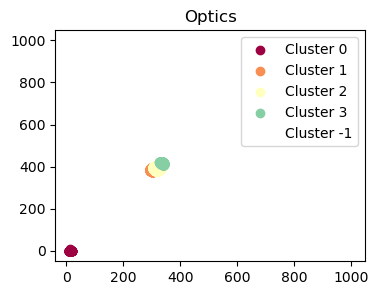

In [63]:
plt.figure(figsize=(4, 3))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'none'  #  'k' Czarny kolor dla punktów odstających
    class_member_mask = (labels == label)
    xy = data_2[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[color], label='Cluster %d' % label)

plt.title('Optics')
plt.legend(loc='upper right')
plt.show()

In [15]:
np.random.seed(0)  # Ustaw ziarno losowe dla reprodukowalności
random_indices = np.random.choice(len(data_4), len(data_3) // 30, replace=False)
reduced_data = data_4[random_indices]

#print(len(reduced_data))

In [12]:
optics = OPTICS(max_eps=4, min_samples=100).fit(reduced_data)
labels = optics.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 24632


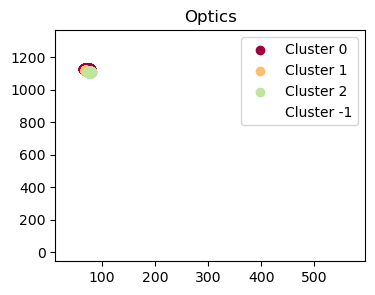

In [14]:
plt.figure(figsize=(4, 3))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'none'  #  'k' Czarny kolor dla punktów odstających
    class_member_mask = (labels == label)
    xy = reduced_data[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[color], label='Cluster %d' % label)

plt.title('Optics')
plt.legend(loc='upper right')
plt.show()

In [28]:
optics = OPTICS(max_eps=10, min_samples=200).fit(reduced_data)
labels = optics.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 20872


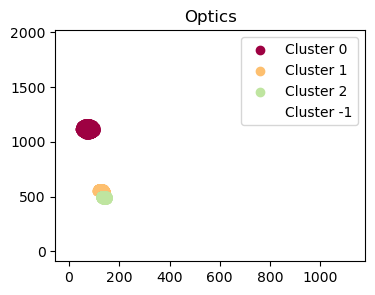

In [31]:
plt.figure(figsize=(4, 3))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'none'  #  'k' Czarny kolor dla punktów odstających
    class_member_mask = (labels == label)
    xy = reduced_data[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[color], label='Cluster %d' % label)

plt.title('Optics')
plt.legend(loc='upper right')
plt.show()

## Code for BisectingKMeans and Regular K-Means

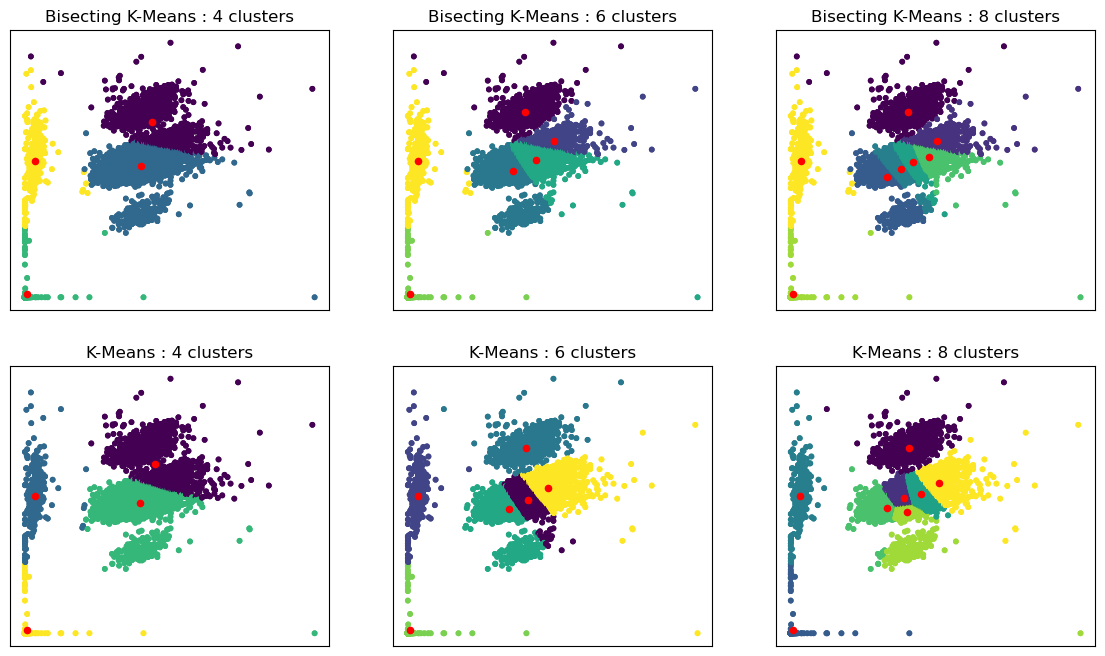

In [12]:
X = data_1
random_state = 0

# Number of cluster centers for KMeans and BisectingKMeans
n_clusters_list = [4, 6, 8]

# Algorithms to compare
clustering_algorithms = {
    "Bisecting K-Means": BisectingKMeans,
    "K-Means": KMeans,
}

# Make subplots for each variant
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(14, 8)
)

axs = axs.T

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        algo = Algorithm(n_clusters=n_clusters, random_state=random_state, n_init=3)
        algo.fit(X)
        centers = algo.cluster_centers_

        axs[j, i].scatter(X[:, 0], X[:, 1], s=10, c=algo.labels_)
        axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()

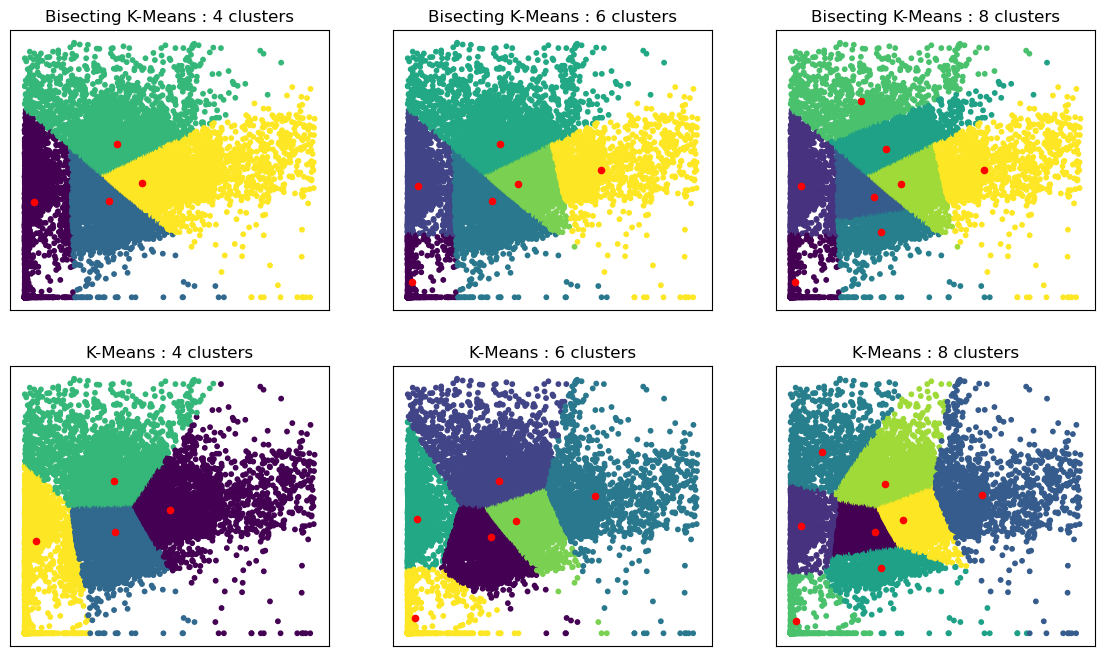

In [3]:
X = data_2
random_state = 0

# Number of cluster centers for KMeans and BisectingKMeans
n_clusters_list = [4, 6, 8]

# Algorithms to compare
clustering_algorithms = {
    "Bisecting K-Means": BisectingKMeans,
    "K-Means": KMeans,
}

# Make subplots for each variant
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(14, 8)
)

axs = axs.T

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        algo = Algorithm(n_clusters=n_clusters, random_state=random_state, n_init=3)
        algo.fit(X)
        centers = algo.cluster_centers_

        axs[j, i].scatter(X[:, 0], X[:, 1], s=10, c=algo.labels_)
        axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

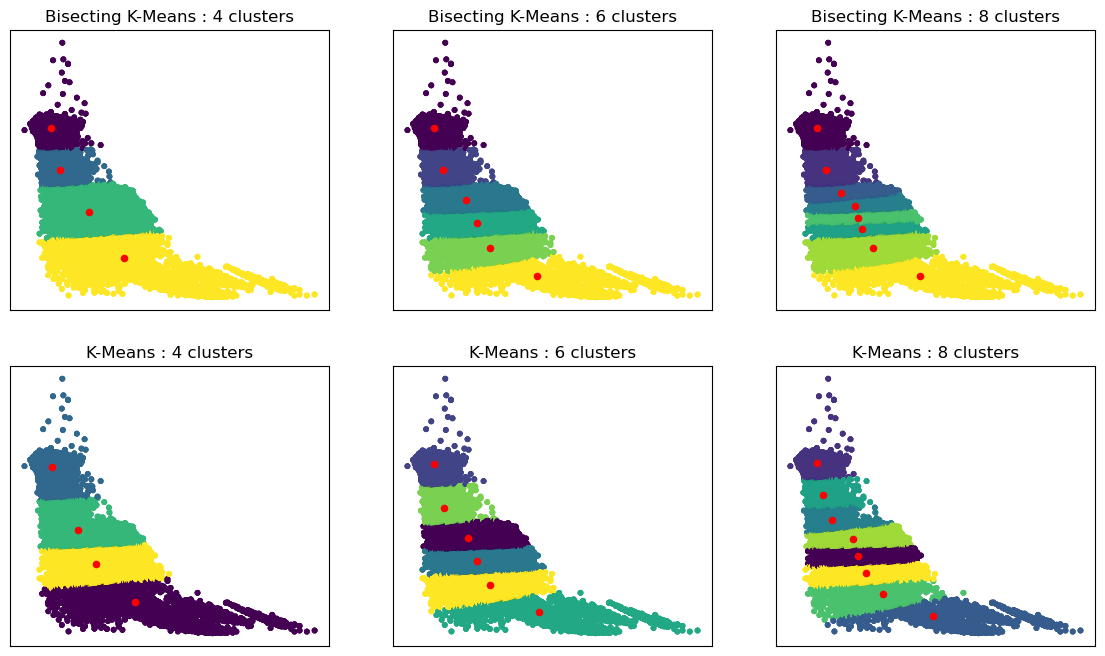

In [4]:
X = data_3
random_state = 0

# Number of cluster centers for KMeans and BisectingKMeans
n_clusters_list = [4, 6, 8]

# Algorithms to compare
clustering_algorithms = {
    "Bisecting K-Means": BisectingKMeans,
    "K-Means": KMeans,
}

# Make subplots for each variant
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(14, 8)
)

axs = axs.T

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        algo = Algorithm(n_clusters=n_clusters, random_state=random_state, n_init=3)
        algo.fit(X)
        centers = algo.cluster_centers_

        axs[j, i].scatter(X[:, 0], X[:, 1], s=10, c=algo.labels_)
        axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

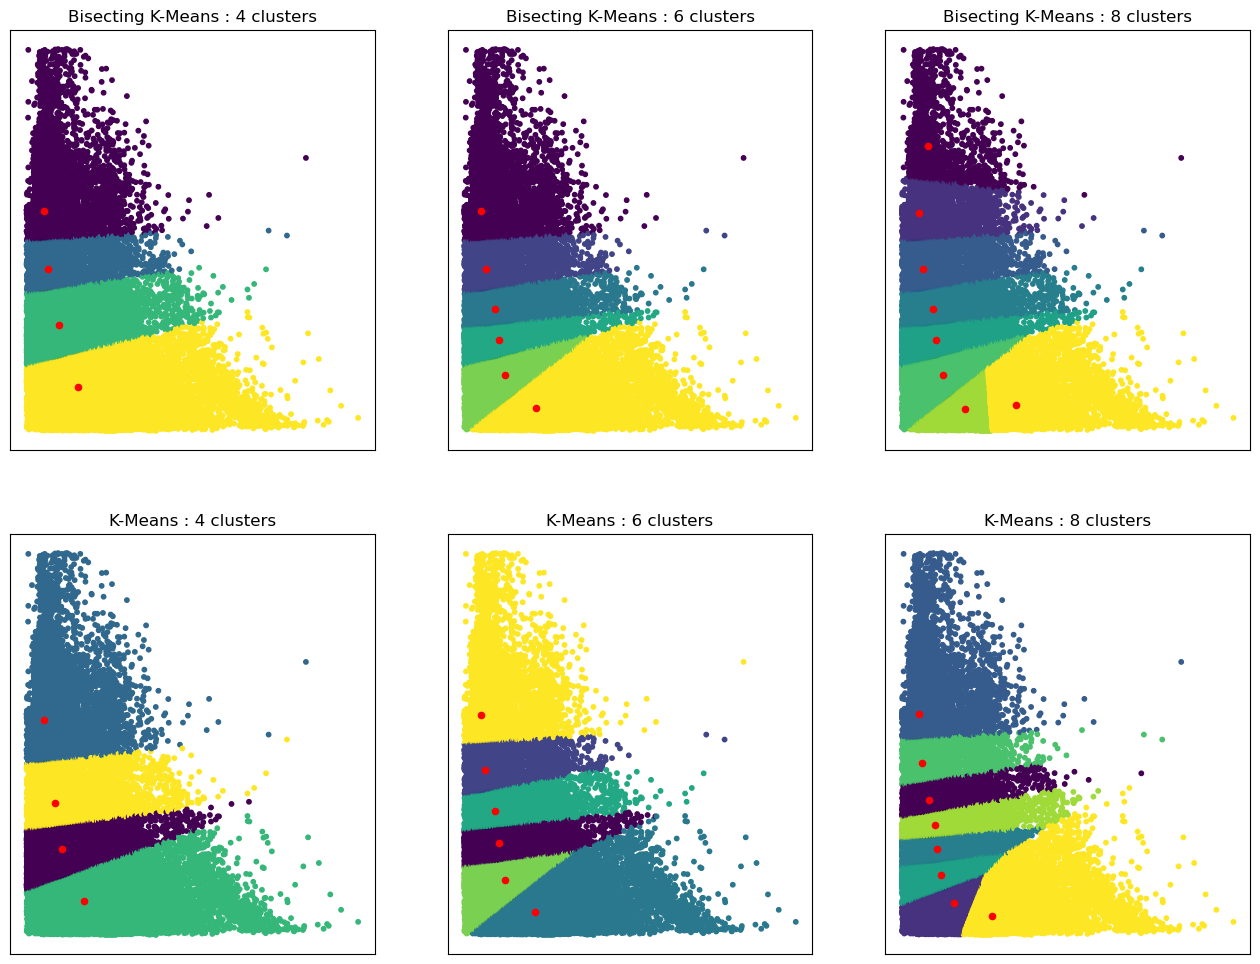

In [6]:
X = data_4
random_state = 0

# Number of cluster centers for KMeans and BisectingKMeans
n_clusters_list = [4, 6, 8]

# Algorithms to compare
clustering_algorithms = {
    "Bisecting K-Means": BisectingKMeans,
    "K-Means": KMeans,
}

# Make subplots for each variant
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(16, 12)
)

axs = axs.T

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        algo = Algorithm(n_clusters=n_clusters, random_state=random_state, n_init=3)
        algo.fit(X)
        centers = algo.cluster_centers_

        axs[j, i].scatter(X[:, 0], X[:, 1], s=10, c=algo.labels_)
        axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

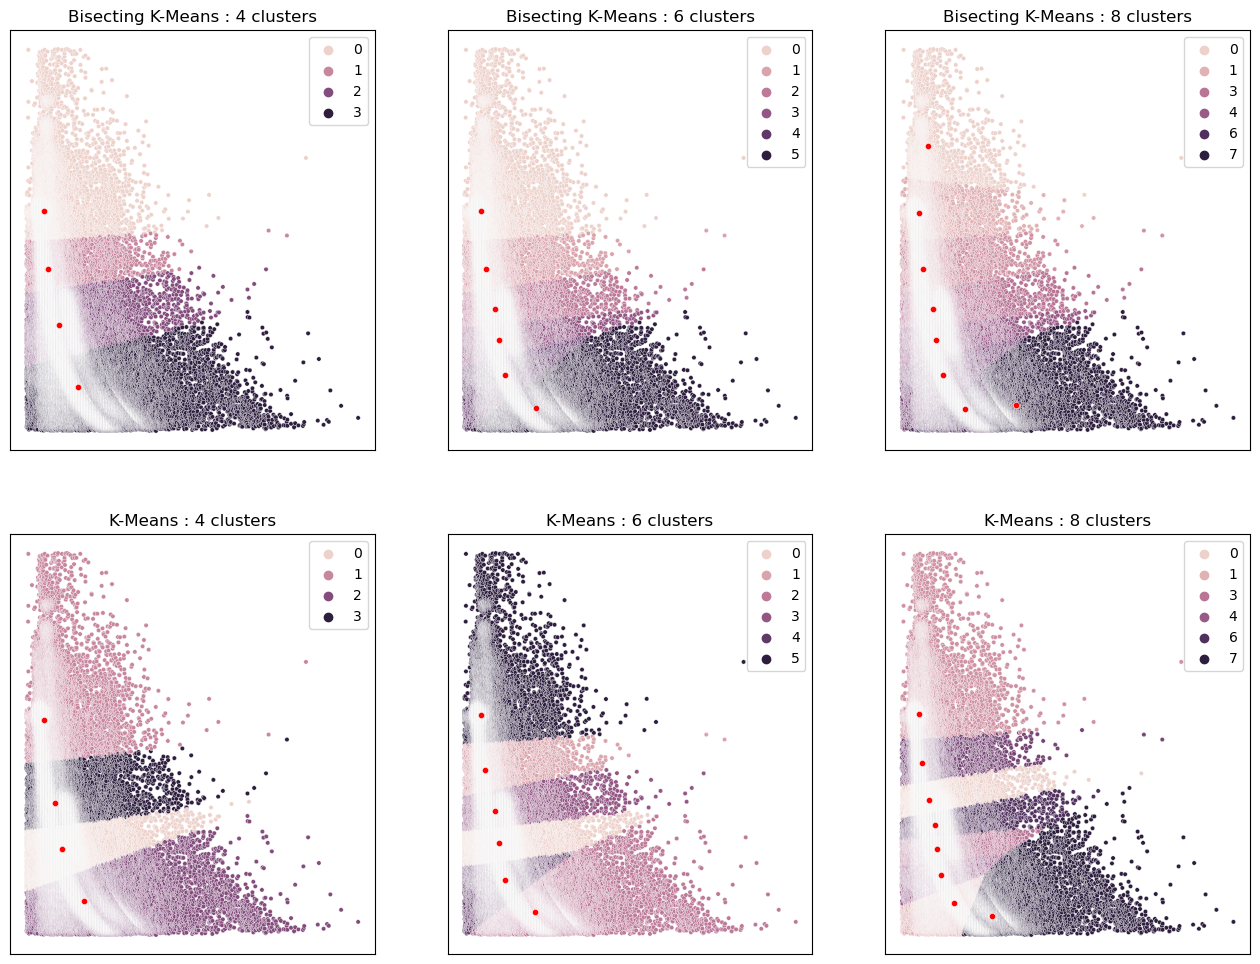

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering, Birch, MiniBatchKMeans, MeanShift, AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, BisectingKMeans

X = data_4
random_state = 0

# Number of cluster centers for KMeans and BisectingKMeans
n_clusters_list = [4, 6, 8]

# Algorithms to compare
clustering_algorithms = {
    "Bisecting K-Means": BisectingKMeans,
    "K-Means": KMeans,
}

# Make subplots for each variant
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(16, 12)
)

axs = axs.T

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        algo = Algorithm(n_clusters=n_clusters, random_state=random_state, n_init=3)
        algo.fit(X)
        centers = algo.cluster_centers_

        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=algo.labels_, ax=axs[j, i], s=10)
        sns.scatterplot(x=centers[:, 0], y=centers[:, 1], ax=axs[j, i], color="r", s=20)

        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

## Tuning hyperparameters

### Tuning for DBSCAN

Sprawdzone zostały metody Davies-Bouldin Index, Calinski-Harabasz Index oraz Silhouette Coefficient.

Silhouette Coefficient niezadowalające rezultaty dla data_1.

#### Davies-Bouldin

| Parameters | Data_1 | Data_2 | Data_3 | Data_4 |
|------------|------------|------------|------------|------------|
| Best Score: | 6.234 | 24.259 | 0 | 11.095 |
| Best Eps: | 5 | 3 | 0 | 3 |
| Best Min_samples: | 25 | 15 | 0 | 100 |
| Clusters: | 13 | 45 | 0 | 6 |
| Noise points: | 3164 | 17743 | 0 | 61249 |


#### Calinski-Harabasz

| Parameters | Data_1 | Data_2 | Data_3 | Data_4 |
|------------|------------|------------|------------|------------|
| Best Score: | 13699.904 | 24.259 | 0 | 0 |
| Best Eps: | 15 | 3 | 0 | 0 |
| Best Min_samples: | 70 | 15 | 0 | 0 |
| Clusters: | 5 | 45 | 0 | 0 |
| Noise points: | 1087 | 17743 | 0 | 0 |

#### Training for data_1

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn import metrics

from sklearn.model_selection import train_test_split

In [34]:
data_1 = np.loadtxt('c12_data.txt', delimiter='\t')

In [35]:
#training values
eps_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
min_samples_values = [10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 150, 175, 180, 190, 200]

In [36]:
X = data_1
test_size = 0.2
random_seed = 40
X_train, X_val = train_test_split(X, test_size=test_size, random_state=random_seed)

In [37]:
best_score = -1  # Initialize the best score
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        # Create and fit the DBSCAN model with the current hyperparameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_train)  # Use X_train for training
        
        # Compute the Optimazation Score to evaluate the clustering quality
        score = metrics.calinski_harabasz_score(X_train, labels)  # Use X_train for evaluation
        
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

print(f"Best Score: {best_score}")
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")

# Train the DBSCAN model on the entire training dataset with the best hyperparameters
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_dbscan.fit_predict(X_train)

# Use X_val for validation
validation_labels = best_dbscan.fit_predict(X_val)

# Visualize the clustering results and assess their quality using your chosen evaluation metric
# Make sure the clusters make sense based on your domain knowledge

Best Score: 13699.904147503825
Best eps: 15
Best min_samples: 70


In [41]:
db_data_1 = DBSCAN(eps=5, min_samples=25).fit(data_1)  #15 and 100 for optimazied Call_Har
labels_data_1 = db_data_1.labels_

n_clusters_data_1 = len(set(labels_data_1)) - (1 if -1 in labels_data_1 else 0)
n_noise_data_1 = list(labels_data_1).count(-1)

print("Estimated number of clusters: %d" % n_clusters_data_1)
print("Estimated number of noise points: %d" % n_noise_data_1)

Estimated number of clusters: 13
Estimated number of noise points: 3164


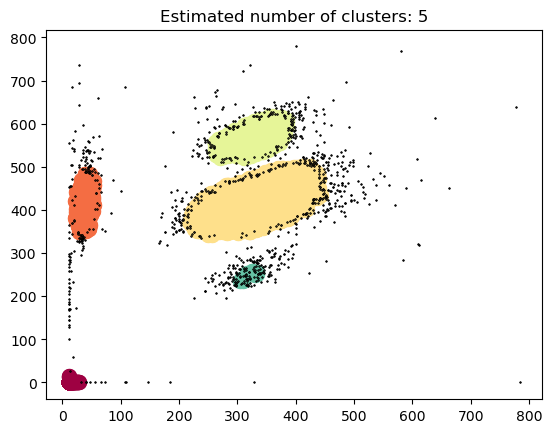

In [40]:
plot_clusters(data_1, db_data_1, labels_data_1, n_clusters_data_1)

#### Training dor data_2

In [44]:
data_2 = np.loadtxt('c12_noise_data.txt', delimiter='\t')

#training values
eps_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
min_samples_values = [10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 150, 175, 180, 190, 200]

In [45]:
X = data_2
test_size = 0.2
random_seed = 40
X_train, X_val = train_test_split(X, test_size=test_size, random_state=random_seed)

In [46]:
best_score = -1  # Initialize the best score
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        # Create and fit the DBSCAN model with the current hyperparameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_train)  # Use X_train for training
        
        # Compute the Optimazation Score to evaluate the clustering quality
        score = metrics.davies_bouldin_score(X_train, labels)  # Use X_train for evaluation
        
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

print(f"Best Score: {best_score}")
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")

# Train the DBSCAN model on the entire training dataset with the best hyperparameters
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_dbscan.fit_predict(X_train)

# Use X_val for validation
validation_labels = best_dbscan.fit_predict(X_val)

# Visualize the clustering results and assess their quality using your chosen evaluation metric
# Make sure the clusters make sense based on your domain knowledge

Best Score: 24.25962131429584
Best eps: 3
Best min_samples: 15


In [47]:
db_data_2 = DBSCAN(eps=3, min_samples=15).fit(data_2) #10
labels_data_2 = db_data_2.labels_

n_clusters_data_2 = len(set(labels_data_2)) - (1 if -1 in labels_data_2 else 0)
n_noise_data_2 = list(labels_data_2).count(-1)

print("Estimated number of clusters: %d" % n_clusters_data_2)
print("Estimated number of noise points: %d" % n_noise_data_2)

Estimated number of clusters: 45
Estimated number of noise points: 17743


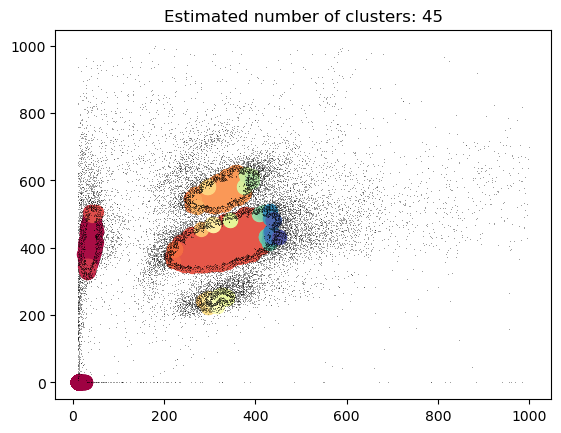

In [48]:
plot_clusters(data_2, db_data_2, labels_data_2, n_clusters_data_2, noise='none')

#### Training for data_3

In [7]:
data_3 = np.loadtxt('3N_forces_data.txt', delimiter='\t')

#training values
eps_values = [3, 4, 5]
min_samples_values = [25, 50, 100, 150, 200]

In [8]:
X = data_3
test_size = 0.2
random_seed = 40
X_train, X_val = train_test_split(X, test_size=test_size, random_state=random_seed)

In [ ]:
best_score = -1  # Initialize the best score
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        # Create and fit the DBSCAN model with the current hyperparameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_train)  # Use X_train for training
        
        # Compute the Optimazation Score to evaluate the clustering quality
        score = metrics.davies_bouldin_score(X_train, labels)  # Use X_train for evaluation
        
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

print(f"Best Score: {best_score}")
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")

# Train the DBSCAN model on the entire training dataset with the best hyperparameters
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_dbscan.fit_predict(X_train)

# Use X_val for validation
validation_labels = best_dbscan.fit_predict(X_val)

# Visualize the clustering results and assess their quality using your chosen evaluation metric
# Make sure the clusters make sense based on your domain knowledge

In [ ]:
#eps=3, min=100 oraz eps=4 i min 50
db_data_3 = DBSCAN(eps=3, min_samples=100).fit(data_3)  #wywala na epsilon 5, eps=4 i min=50 działa
labels_data_3 = db_data_3.labels_ 

n_clusters_data_3 = len(set(labels_data_3)) - (1 if -1 in labels_data_3 else 0)
n_noise_data_3 = list(labels_data_3).count(-1)

print("Estimated number of clusters: %d" % n_clusters_data_3)
print("Estimated number of noise points: %d" % n_noise_data_3)

In [ ]:
plot_clusters(data_3, db_data_3, labels_data_3, n_clusters_data_3)

#### Training for data_4

In [5]:
data_4 = np.loadtxt('3N_forces_noise_data.txt', delimiter='\t')

#training values
eps_values = [3, 4, 5]
min_samples_values = [25, 50, 100, 150, 200]

In [6]:
X = data_4
test_size = 0.2
random_seed = 40
X_train, X_val = train_test_split(X, test_size=test_size, random_state=random_seed)

In [13]:
best_score = -1  # Initialize the best score
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        # Create and fit the DBSCAN model with the current hyperparameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_train)  # Use X_train for training
        
        # Compute the Optimazation Score to evaluate the clustering quality
        score = metrics.calinski_harabasz_score(X_train, labels)  # Use X_train for evaluation
        
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

print(f"Best Score: {best_score}")
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")

# Train the DBSCAN model on the entire training dataset with the best hyperparameters
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_dbscan.fit_predict(X_train)

# Use X_val for validation
validation_labels = best_dbscan.fit_predict(X_val)

# Visualize the clustering results and assess their quality using your chosen evaluation metric
# Make sure the clusters make sense based on your domain knowledge

Best Score: 25632.113807128604
Best eps: 3
Best min_samples: 200


In [11]:
#eps=3, min=100 oraz eps=4 i min 50
db_data_3 = DBSCAN(eps=3, min_samples=100).fit(data_3)  #wywala na epsilon 5, eps=4 i min=50 działa
labels_data_3 = db_data_3.labels_ 

n_clusters_data_3 = len(set(labels_data_3)) - (1 if -1 in labels_data_3 else 0)
n_noise_data_3 = list(labels_data_3).count(-1)

print("Estimated number of clusters: %d" % n_clusters_data_3)
print("Estimated number of noise points: %d" % n_noise_data_3)

Estimated number of clusters: 6
Estimated number of noise points: 61249


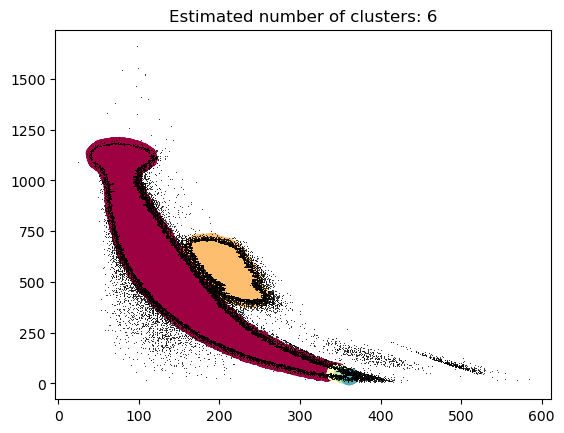

In [12]:
plot_clusters(data_3, db_data_3, labels_data_3, n_clusters_data_3, noise='none')